In [1]:
import tensorflow as tf
import math
print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

TensorFlow version: 2.9.2


In [2]:
def FCN_model(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=shape))
    model.add(tf.keras.layers.Conv2D(filters=127, kernel_size=4, strides=1, padding="valid",activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=119, kernel_size=5, strides=1,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=340, kernel_size=3,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=129, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    
    model.add(tf.keras.layers.Conv2D(filters=369, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model
fcn0=FCN_model(len_classes=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 227, 227, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 127)     2159      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 127)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 119)     377944    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 119)      0         
 2D)                                                             
                                                        

In [3]:
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3
train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=(227,227) ,\
      subset='training',seed=12, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=(227,227), subset='validation',seed=12,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=(227,227), batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [4]:
fcn0.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [6]:
history = fcn0.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 62s 598ms/step - loss: 0.7391 - binary_accuracy: 0.5644 - val_loss: 0.6431 - val_binary_accuracy: 0.6569
Epoch 2/100
89/89 [==============================] - 48s 542ms/step - loss: 0.6219 - binary_accuracy: 0.6712 - val_loss: 0.6029 - val_binary_accuracy: 0.7025
Epoch 3/100
89/89 [==============================] - 48s 542ms/step - loss: 0.5482 - binary_accuracy: 0.7420 - val_loss: 0.5822 - val_binary_accuracy: 0.7251
Epoch 4/100
89/89 [==============================] - 48s 542ms/step - loss: 0.5199 - binary_accuracy: 0.7636 - val_loss: 0.5377 - val_binary_accuracy: 0.7749
Epoch 5/100
89/89 [==============================] - 49s 543ms/step - loss: 0.4864 - binary_accuracy: 0.7890 - val_loss: 0.5252 - val_binary_accuracy: 0.7855
Epoch 6/100
89/89 [==============================] - 48s 543ms/step - loss: 0.4426 - binary_accuracy: 0.8231 - val_loss: 0.5640 - val_binary_accuracy: 0.7629
Epoch 7/100
89/89 [==============================] -

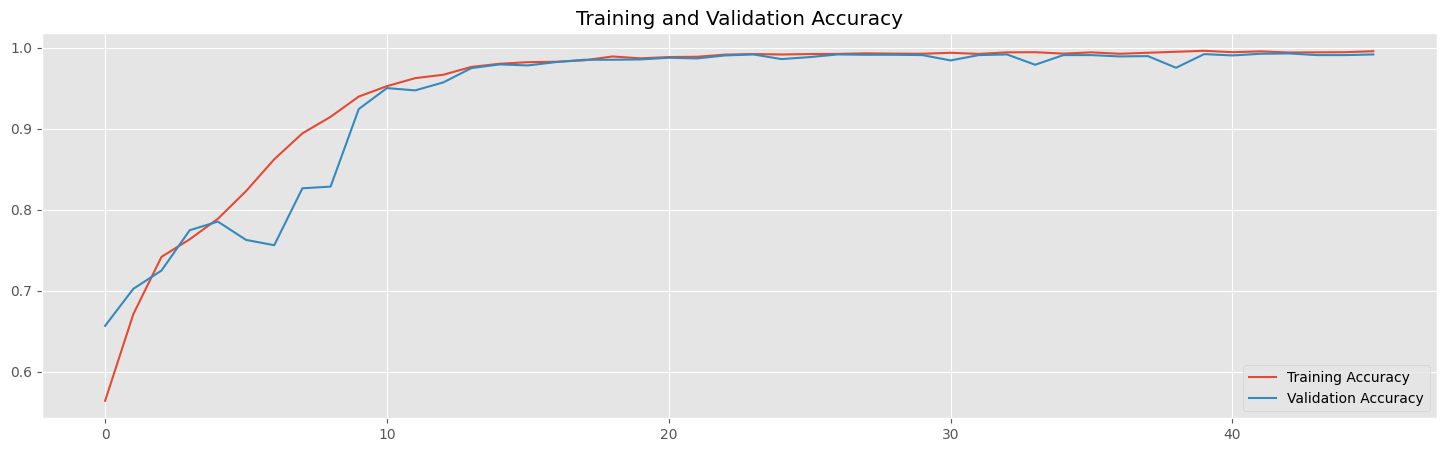

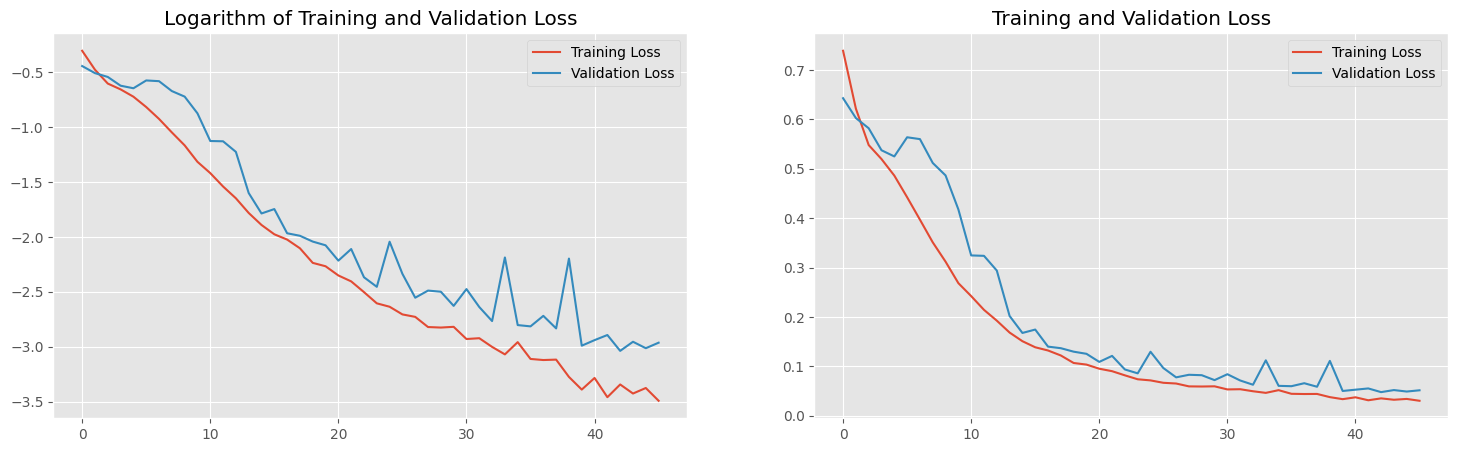

In [7]:
epochs_run=len(history.epoch)
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [8]:
results = fcn0.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results)

15/15 [==============================] - 3s 146ms/step - loss: 0.1903 - binary_accuracy: 0.9456
test loss, test acc: [0.19034506380558014, 0.945555567741394]


In [9]:
def FCN_model2(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=shape))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, strides=1, padding="valid",activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=119, kernel_size=5, strides=1,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=340, kernel_size=3,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=356, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


    model.add(tf.keras.layers.Conv2D(filters=110, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=129, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    
    model.add(tf.keras.layers.Conv2D(filters=369, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model
fcn0=FCN_model(len_classes=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 227, 227, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 127)     2159      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 127)    0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 119)     377944    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 119)      0         
 2D)                                                             
                                                      

In [10]:
fcn1=FCN_model2(len_classes=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 227, 227, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1088      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 108, 108, 119)     190519    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 119)      0         
 2D)                                                             
                                                      

In [11]:
fcn1.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [12]:
history1= fcn1.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 49s 508ms/step - loss: 0.7169 - binary_accuracy: 0.5509 - val_loss: 0.6935 - val_binary_accuracy: 0.6652
Epoch 2/100
89/89 [==============================] - 42s 471ms/step - loss: 0.6393 - binary_accuracy: 0.6272 - val_loss: 0.6049 - val_binary_accuracy: 0.7256
Epoch 3/100
89/89 [==============================] - 42s 467ms/step - loss: 0.5553 - binary_accuracy: 0.7254 - val_loss: 0.6290 - val_binary_accuracy: 0.6861
Epoch 4/100
89/89 [==============================] - 42s 469ms/step - loss: 0.5253 - binary_accuracy: 0.7533 - val_loss: 0.5560 - val_binary_accuracy: 0.7535
Epoch 5/100
89/89 [==============================] - 42s 470ms/step - loss: 0.5024 - binary_accuracy: 0.7693 - val_loss: 0.5395 - val_binary_accuracy: 0.7691
Epoch 6/100
89/89 [==============================] - 42s 470ms/step - loss: 0.4657 - binary_accuracy: 0.8045 - val_loss: 0.5304 - val_binary_accuracy: 0.7814
Epoch 7/100
89/89 [==============================] -

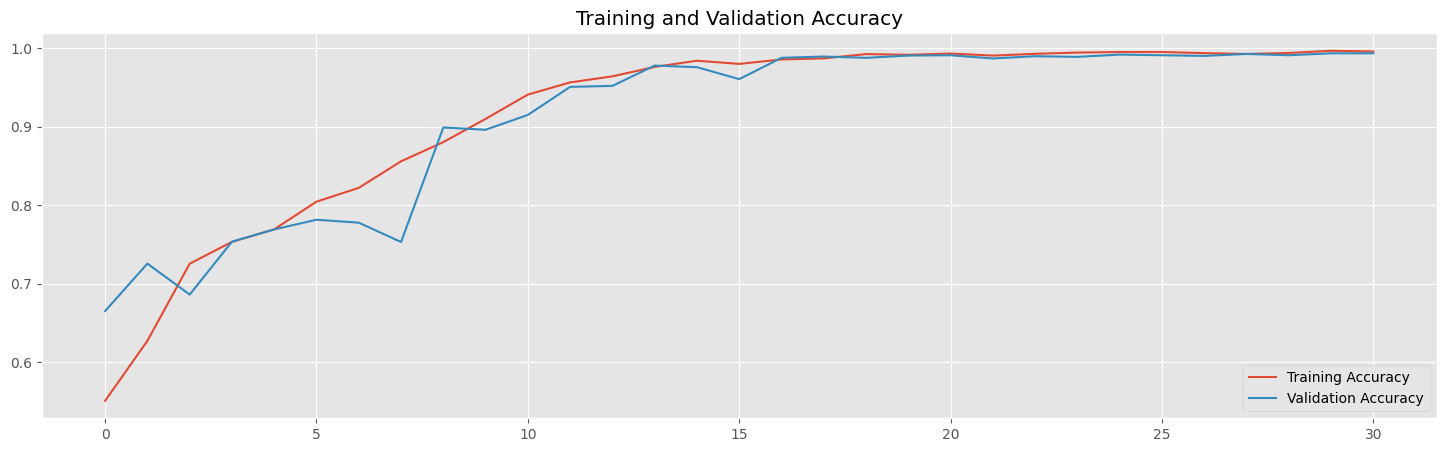

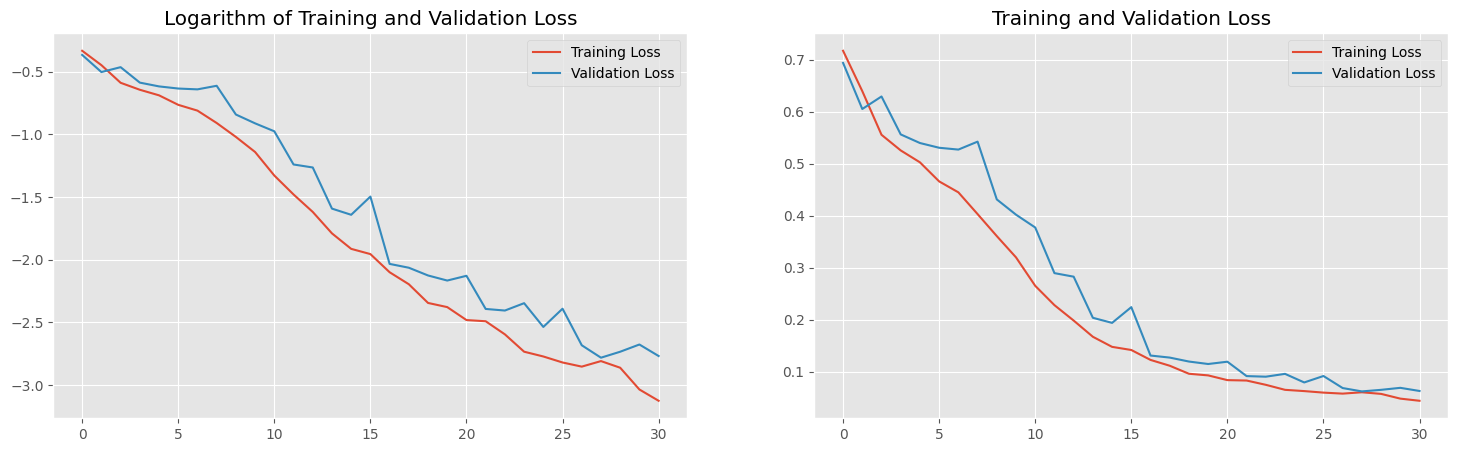

In [13]:
epochs_run=len(history1.epoch)
acc = history1.history['binary_accuracy']
val_acc = history1.history['val_binary_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [14]:
def FCN_model(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=shape))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=4, strides=1, padding="valid",activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=119, kernel_size=5, strides=1,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=340, kernel_size=3,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=356, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


    model.add(tf.keras.layers.Conv2D(filters=110, kernel_size=4,activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=129, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=5,activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model
fcn0=FCN_model(len_classes=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 227, 227, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 256)     4352      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 119)     761719    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 119)      0         
 g2D)                                                            
                                                      

In [15]:
fcn2=FCN_model3(len_classes=2)

NameError: name 'FCN_model3' is not defined

In [ ]:
fcn2.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [ ]:
history2= fcn2.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

In [ ]:
epochs_run=len(history2.epoch)
acc = history2.history['binary_accuracy']
val_acc = history2.history['val_binary_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [ ]:
results1 = fcn1.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results1)

In [ ]:
results2 = fcn2.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results2)